In [ ]:
# Step 1: Import libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Step 2: Load the dataset
df = pd.read_csv('/content/loan_approval_dataset.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())  # Check missing values

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [ ]:
# Removing column name spaces
df.columns = df.columns.str.strip()

df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
# Step 3: Preprocessing
# Handle missing values
# Fill with mean/median for numerical columns

# Fill with mode for categorical columns

# Example: fill missing numerical with median
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Lets see what dataset looks like now
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# Encode categorical variables

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Feature scaling (recommended for logistic regression)

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
# Lets see what dataset looks like now
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-1.731645,-0.294102,0,0,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,0
1,-1.730834,-1.473548,1,1,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,1
2,-1.730022,0.295621,0,0,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1
3,-1.729211,0.295621,0,0,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,1
4,-1.728399,1.475067,1,1,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,1


In [ ]:
# We can see that categorical columns with string datatype eg. education is now label encoded, and so is our target field loan_status

In [ ]:
# Step 4: Define features & target
# Assume your target column is named Loan_Status (replace if different).

X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [ ]:
# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Train Logistic Regression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Step 7: Evaluate

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9074941451990632
Confusion Matrix:
 [[500  36]
 [ 43 275]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



In [ ]:
# to predict on test data:

y_pred = model.predict(X_test)

In [ ]:
y_pred[0:10] # first 10 cases of y_predicted

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

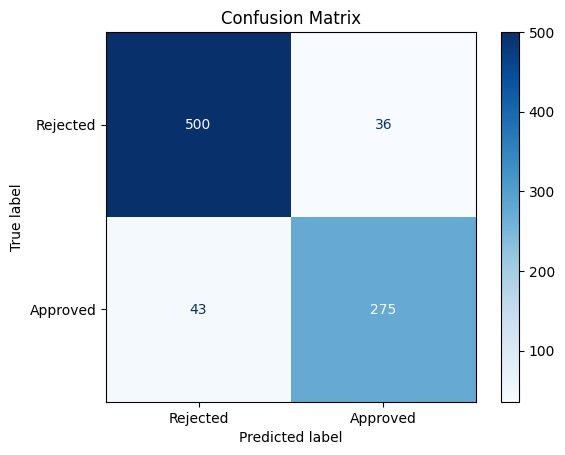

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Rejected', 'Approved'])
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

Here’s what this confusion matrix shows:

Predicted Rejected	Predicted Approved
Actual Rejected	500	36
Actual Approved	43	275

✅ Interpretation:

True Negatives (500): Model correctly predicted 500 applications as rejected when they were actually rejected.

True Positives (275): Model correctly predicted 275 applications as approved when they were actually approved.

False Positives (36): Model incorrectly predicted 36 applications as approved, but they were actually rejected.

False Negatives (43): Model incorrectly predicted 43 applications as rejected, but they were actually approved.

📊 Overall:

The model seems fairly accurate: far more correct predictions (500+275=775) than incorrect (36+43=79).

Relatively balanced errors, though slightly more false negatives (43) than false positives (36).

Confusion matrix helps you see exactly where your model might be more cautious or too optimistic.

